In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Dataset Visualization

* <u>load the dataset</u>: it provides weather information from 1st January 2013 to 24th April 2017 in the city of Delhi, India and it has 4 parameters: <i>mean temperature</i>, <i>humidity</i>, <i>wind speed</i>, and <i>mean pressure</i>
* <u>the date column is parsed as a datetime index</u>
* <u>plot the time series</u>: add labels, titles, and a legend

In [3]:
df = pd.read_csv(
    "C://Users//Sara//Desktop//Data_Science_An1_Sem2//Time Series Analysis//Assignments//DailyDelhiClimateTrain.csv",
    parse_dates=["date"], index_col="date")
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


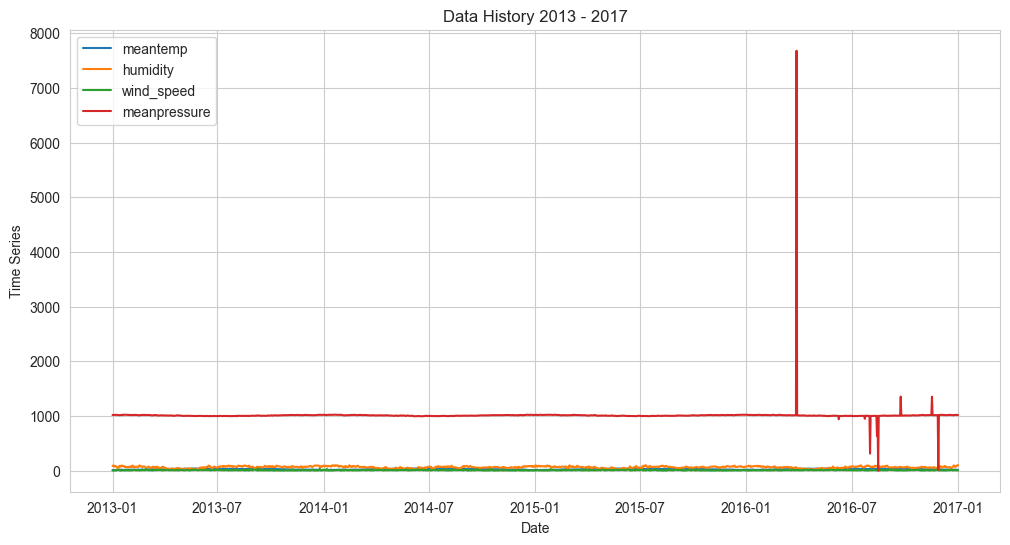

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df)

plt.title('Data History 2013 - 2017')
plt.xlabel('Date')
plt.ylabel('Time Series')
plt.legend(df.columns, loc='upper left')

plt.show()

It can be seen that the pressure has values that deviate significantly from the others, making it challenging to visualize them together. Therefore, I will display them separately.

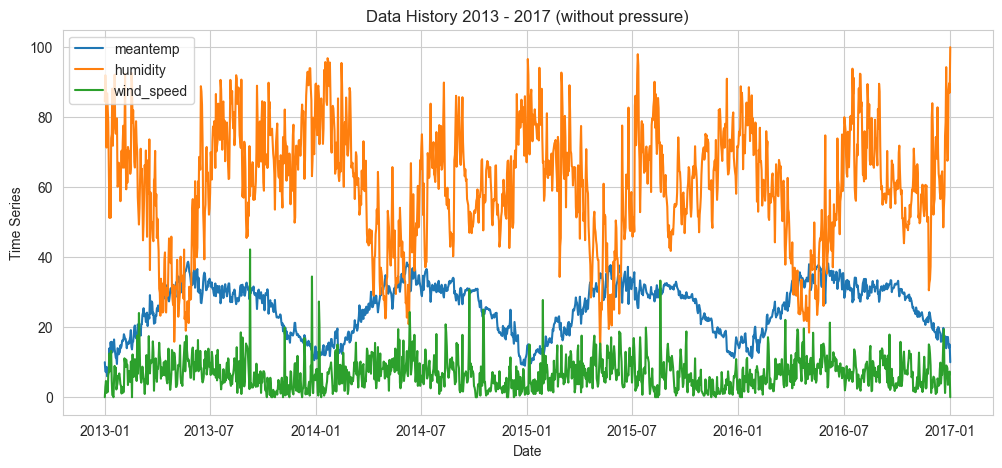

In [5]:
new_df = df.drop('meanpressure', axis=1)
plt.figure(figsize=(12, 5))
plt.plot(new_df)

plt.title('Data History 2013 - 2017 (without pressure)')
plt.xlabel('Date')
plt.ylabel('Time Series')
plt.legend(df.columns, loc='upper left')

plt.show()

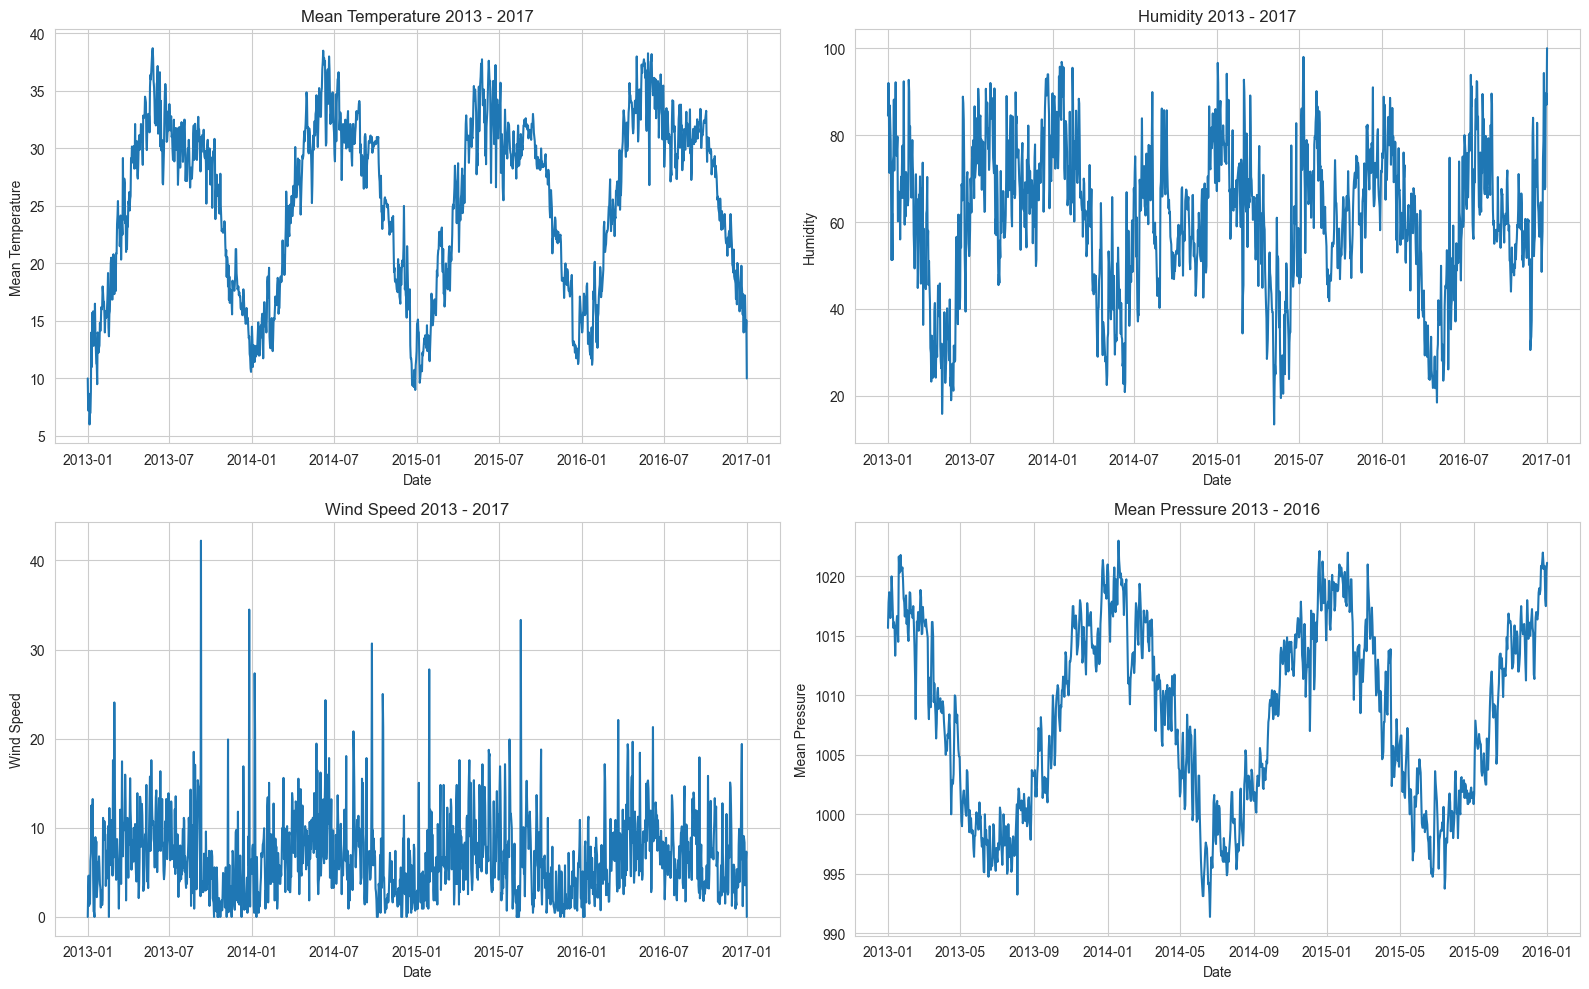

In [6]:
# create 4 subplots to illustrate the time series
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# mean temperature
axes[0, 0].plot(df['meantemp'])
axes[0, 0].set_title('Mean Temperature 2013 - 2017')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Mean Temperature')

# humidity
axes[0, 1].plot(df['humidity'])
axes[0, 1].set_title('Humidity 2013 - 2017')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Humidity')

# wind speed
axes[1, 0].plot(df['wind_speed'])
axes[1, 0].set_title('Wind Speed 2013 - 2017')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Wind Speed')

# mean pressure
# the date has been adjusted to improve data visualization
max_date = pd.to_datetime('2016-01-01')
df_mean_pressure = df[df.index <= max_date]
axes[1, 1].plot(df_mean_pressure['meanpressure'])
axes[1, 1].set_title('Mean Pressure 2013 - 2016')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Mean Pressure')

plt.tight_layout()
plt.show()

I will analyze the  <b>mean temperature</b> in the following steps:
* it represents a <u>seasonal</u>, <u>additive</u> time series

The following plots illustrate:
* the mean temperature for each month (heatmap)
* the mean temperature for each season (heatmap)

Some trends can be observed:
* there are big differences between the Summer and Winter seasons
* the temperature is higher in Spring and Summer (months 4, 5, 6, 7, 8)
* the temperature is lower in Autumn and Winter (months 11, 12, 1 , 2)
* the temperature rises gradually, slowly, but consistently from 2013 to 2017 (all seasons)

In [8]:
df = pd.DataFrame(df['meantemp'])
df.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


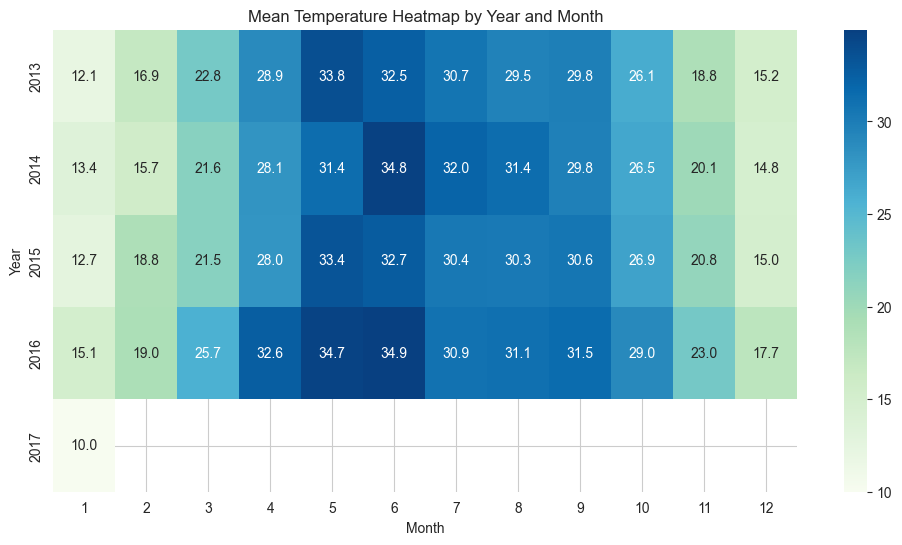

In [9]:
df['Year'] = df.index.year
df['Month'] = df.index.month
pivot_table = df.pivot_table(values='meantemp', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='GnBu', annot=True, fmt=".1f")

plt.title('Mean Temperature Heatmap by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')

plt.show()

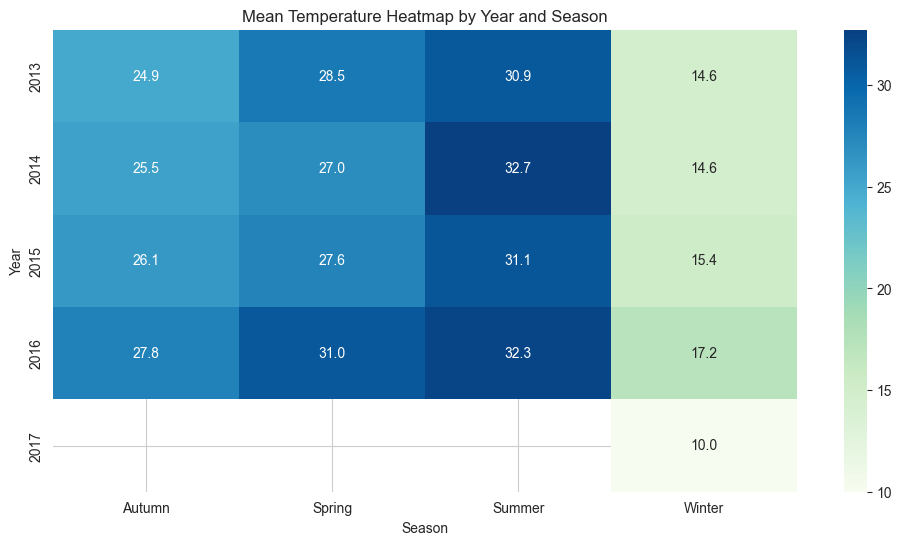

In [10]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'


df['Season'] = df.index.month.map(get_season)
seasonal_pivot_table = df.pivot_table(values='meantemp', index='Year', columns='Season', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_pivot_table, cmap='GnBu', annot=True, fmt=".1f")

plt.title('Mean Temperature Heatmap by Year and Season')
plt.xlabel('Season')
plt.ylabel('Year')

plt.show()

# Statistical Analysis

* <u>compute statistical values</u>: mean, variance, min and max values

In [12]:
df = pd.DataFrame(df['meantemp'])
mean_temp = round(df.mean(), 2).iloc[0]
variance = round(df.var(), 2).iloc[0]
max_value = round(df.max(), 2).iloc[0]
min_value = round(df.min(), 2).iloc[0]

print(f'The mean value is {mean_temp}.')
print(f'The variance is {variance}.')
print(f'The minimum value is {max_value}.')
print(f'The maximum value is {min_value}.')

The mean value is 25.5.
The variance is 53.99.
The minimum value is 38.71.
The maximum value is 6.0.


In [13]:
df.describe()

,meantemp
count,1462.000000
mean,25.495521
std,7.348103
min,6.000000
25%,18.857143
50%,27.714286
75%,31.305804
max,38.714286


# Introduce Missing Values

* <u>randomly remove a subset of datapoints</u>: simulate missing values
* <u>visualize the dataset</u>

In [15]:
# create a function to remove a specified percentage of data
def remove_values(df, percentage):
    df_missing_values = df.copy()
    num_rows = len(df_missing_values)
    num_missing_data = int(percentage * num_rows)
    random_indices = np.random.choice(df_missing_values.index, size=num_missing_data, replace=False)

    df_missing_values.loc[random_indices, 'meantemp'] = np.nan
    return df_missing_values

In [21]:
df_missing_values = remove_values(df, 0.2)

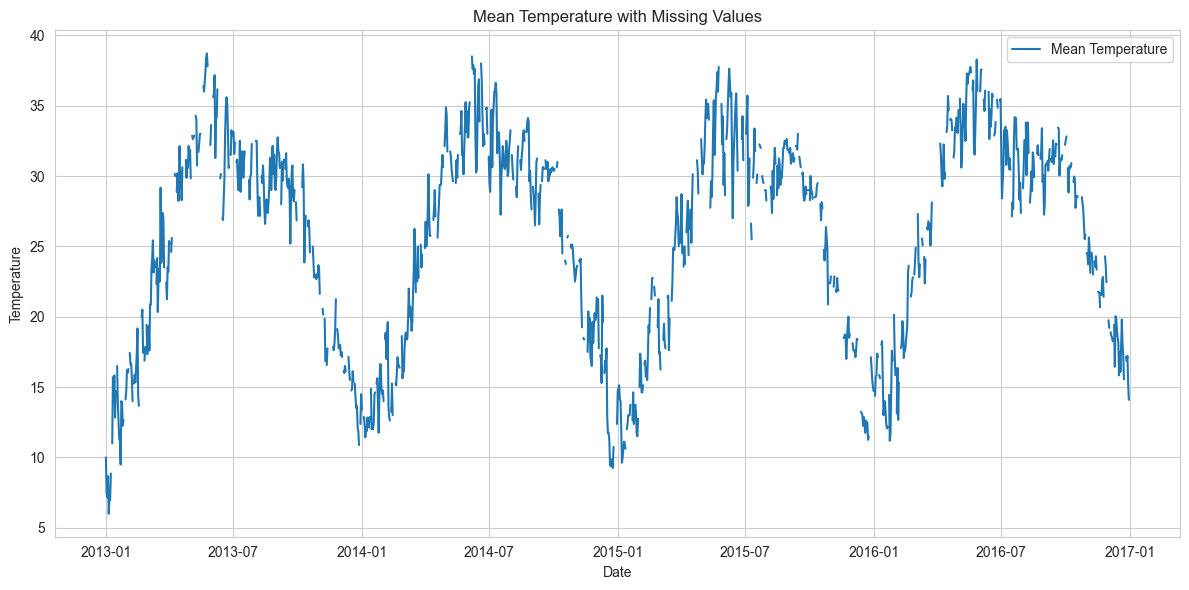

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_missing_values, label='Mean Temperature')

plt.title('Mean Temperature with Missing Values')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

plt.tight_layout()
plt.show()

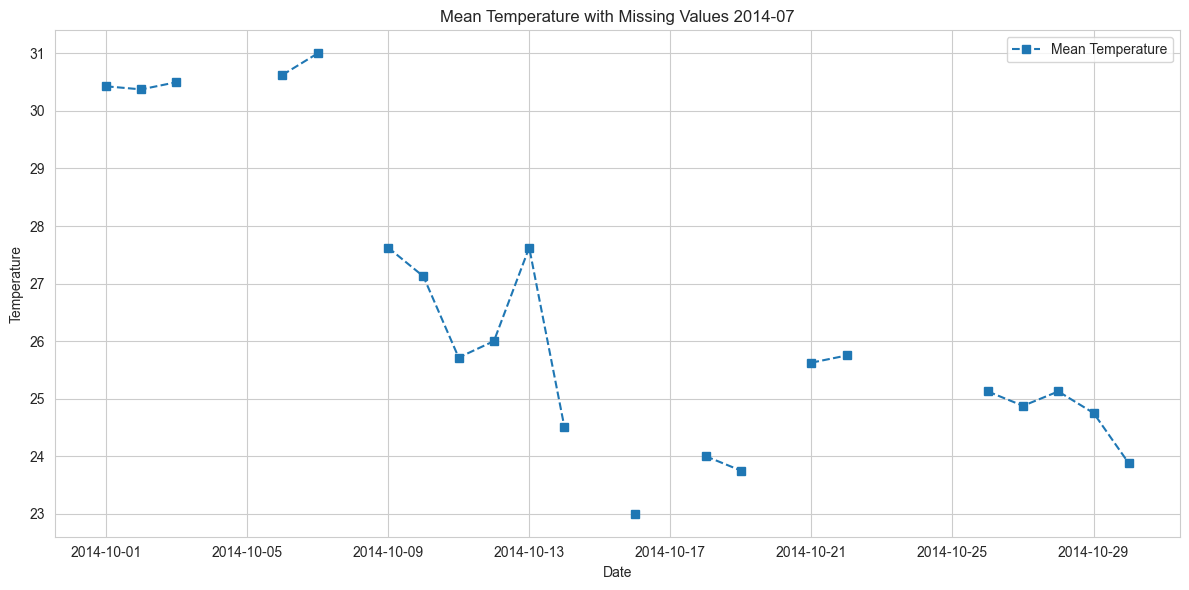

In [24]:
min_date = '2014-10-01'
max_date = '2014-10-30'
df_month = df_missing_values[(df_missing_values.index >= min_date) & (df_missing_values.index <= max_date)]

plt.figure(figsize=(12, 6))
plt.plot(df_month, label='Mean Temperature', marker='s', linestyle='--')

plt.title('Mean Temperature with Missing Values 2014-07')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

plt.tight_layout()
plt.show()

# Handling Missing Values

* <u>forward fill</u>: fills with the previous value
* <u>backward fill</u>: fills with the next value
* <u>moving average</u>: fills with the average of surrounding values
* <u>interpolate</u>: fills using linear/polynomial estimation

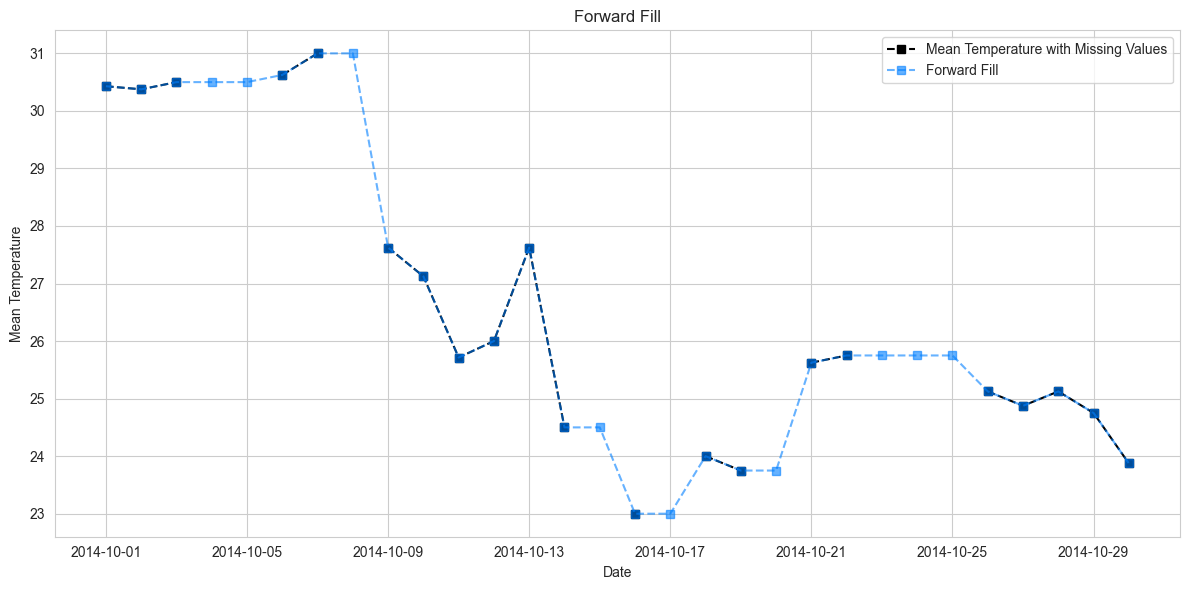

In [25]:
# forward fill
df_forward_fill = df_month.ffill()

plt.figure(figsize=(12, 6))
plt.plot(df_month, label='Mean Temperature with Missing Values', color='black', marker='s', linestyle='--')
plt.plot(df_forward_fill, alpha=0.6, label='Forward Fill', color='#007fff', marker='s', linestyle='--')

plt.title('Forward Fill')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()

plt.tight_layout()
plt.show()

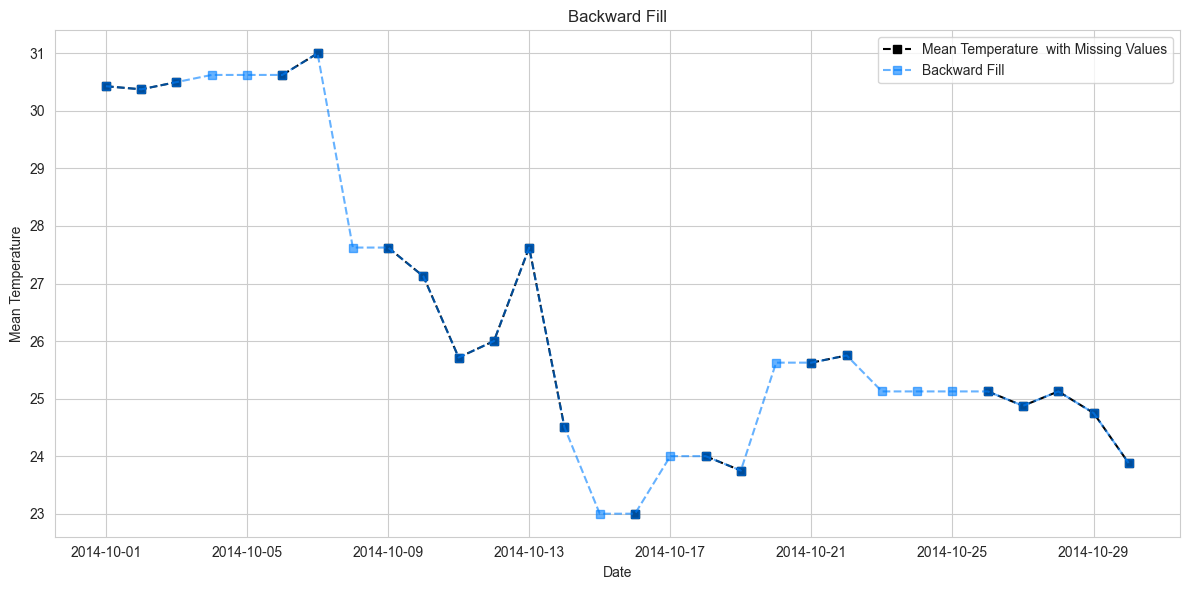

In [26]:
# backward fill
df_backward_fill = df_month.bfill()

plt.figure(figsize=(12, 6))
plt.plot(df_month, label='Mean Temperature  with Missing Values', color='black', marker='s', linestyle='--')
plt.plot(df_backward_fill, alpha=0.6, label='Backward Fill', color='#007fff', marker='s', linestyle='--')

plt.title('Backward Fill')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()

plt.tight_layout()
plt.show()

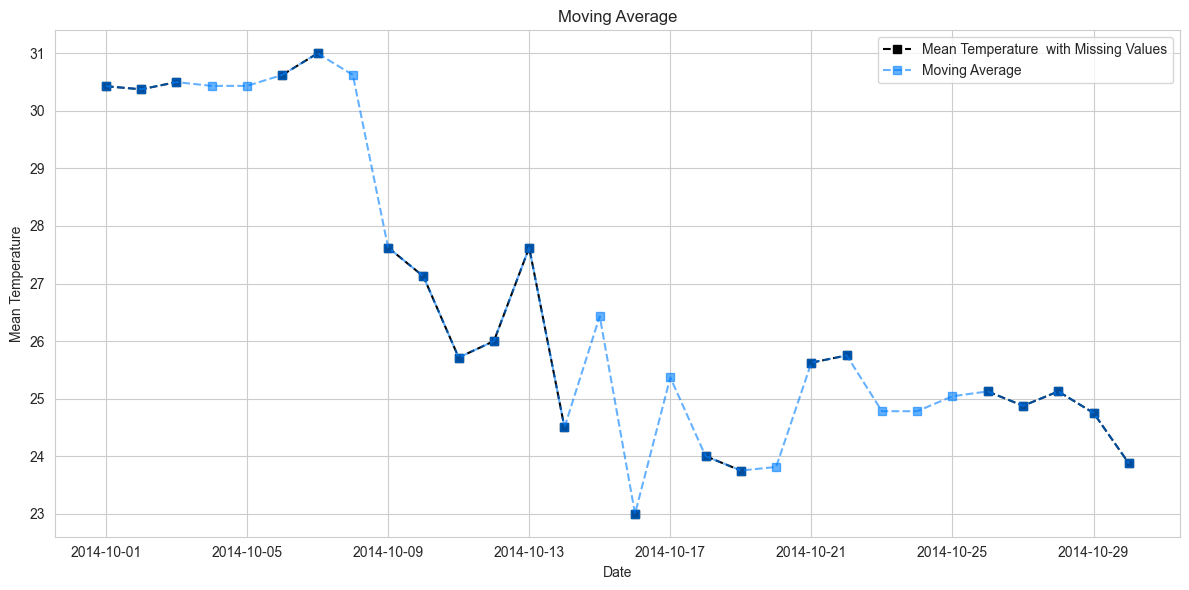

In [27]:
# moving average
df_moving_average = df_month.fillna(df_month.rolling(window=7, min_periods=1).mean())

plt.figure(figsize=(12, 6))
plt.plot(df_month, label='Mean Temperature  with Missing Values', color='black', marker='s', linestyle='--')
plt.plot(df_moving_average, alpha=0.6, label='Moving Average', color='#007fff', marker='s', linestyle='--')

plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()

plt.tight_layout()
plt.show()

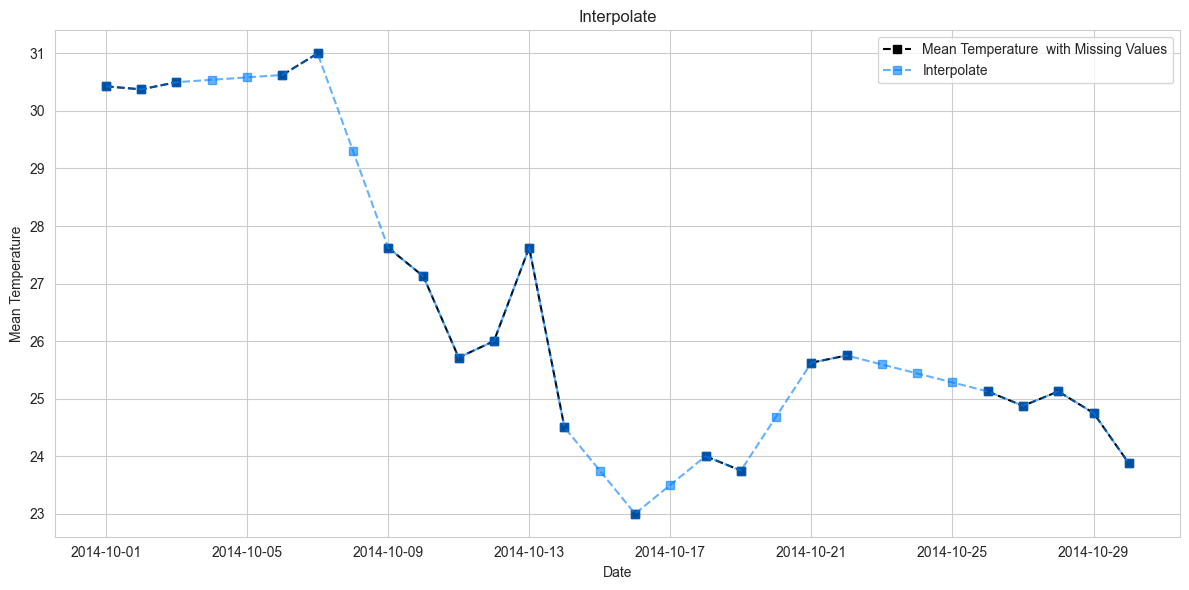

In [28]:
# interpolate
df_interpolate = df_month.interpolate(method='linear', limit_direction='forward')

plt.figure(figsize=(12, 6))
plt.plot(df_month, label='Mean Temperature  with Missing Values', color='black', marker='s', linestyle='--')
plt.plot(df_interpolate, alpha=0.6, label='Interpolate', color='#007fff', marker='s', linestyle='--')

plt.title('Interpolate')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()

plt.tight_layout()
plt.show()

# Time Series Decomposition

* <u>additive</u>: constant seasonality, fixed amplitude
* <u>multiplicative</u>: growing seasonality, proportional changes

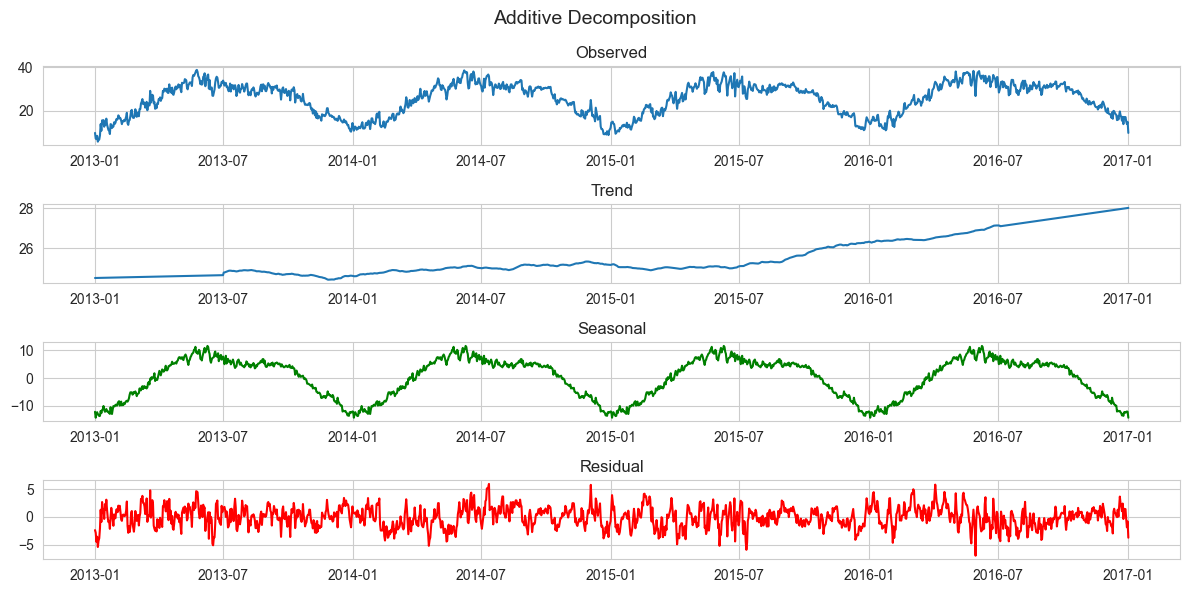

In [29]:
result_additive = seasonal_decompose(df, model='additive', period=365, extrapolate_trend='freq')

fig, ax = plt.subplots(4, 1, figsize=(12, 6))

ax[0].plot(df.index, df['meantemp'])
ax[0].set_title('Observed')

ax[1].plot(result_additive.trend, label='Trend')
ax[1].set_title('Trend')

ax[2].plot(result_additive.seasonal, label='Seasonal', color='green')
ax[2].set_title('Seasonal')

ax[3].plot(result_additive.resid, label='Residual', color='red')
ax[3].set_title('Residual')

fig.suptitle('Additive Decomposition', fontsize=14)

plt.tight_layout()
plt.show()

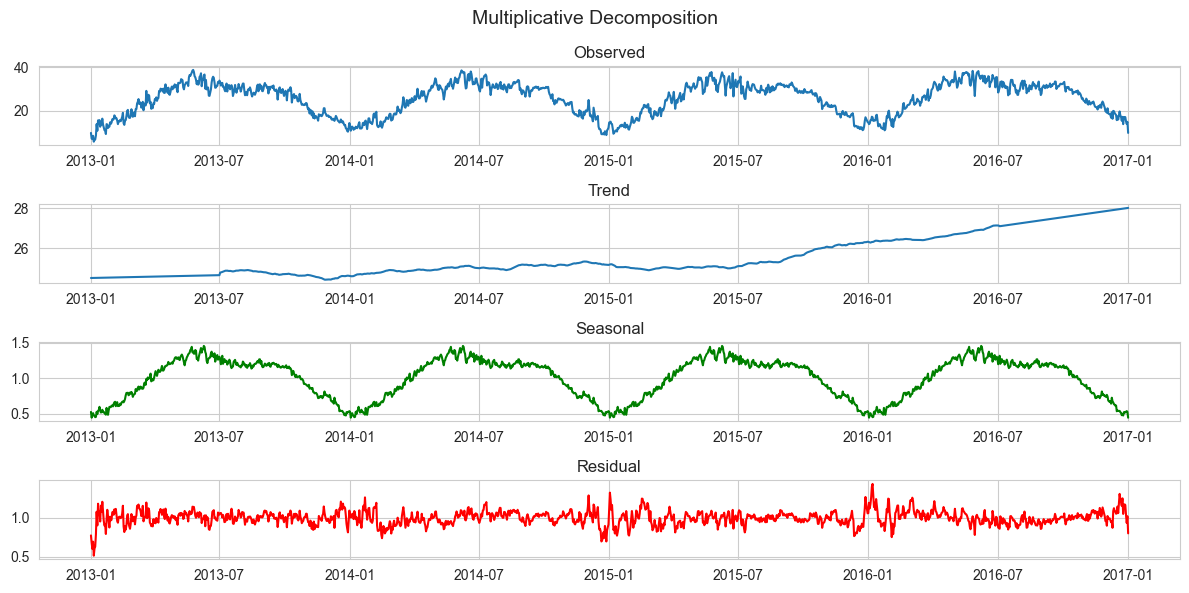

In [30]:
result_multiplicative = seasonal_decompose(df, model='multiplicative', period=365, extrapolate_trend='freq')

fig, ax = plt.subplots(4, 1, figsize=(12, 6))

ax[0].plot(df.index, df['meantemp'])
ax[0].set_title('Observed')

ax[1].plot(result_multiplicative.trend, label='Trend')
ax[1].set_title('Trend')

ax[2].plot(result_multiplicative.seasonal, label='Seasonal', color='green')
ax[2].set_title('Seasonal')

ax[3].plot(result_multiplicative.resid, label='Residual', color='red')
ax[3].set_title('Residual')

fig.suptitle('Multiplicative Decomposition', fontsize=14)

plt.tight_layout()
plt.show()

<u>Observations</u>:
* The time series is <b>additive</b>, as seen in the Observed plot, where the oscillations remain constant, and the seasonality has a consistent magnitude without variation.
* In the trend plot, it is shown that the temperature slowly rises in the final months of 2016, in contrast to 2013, as I also highlighted during the data visualization section

# Creation of new basic synthetic time series

* <u>generate new residual component</u>
* <u>recompose the signal</u>

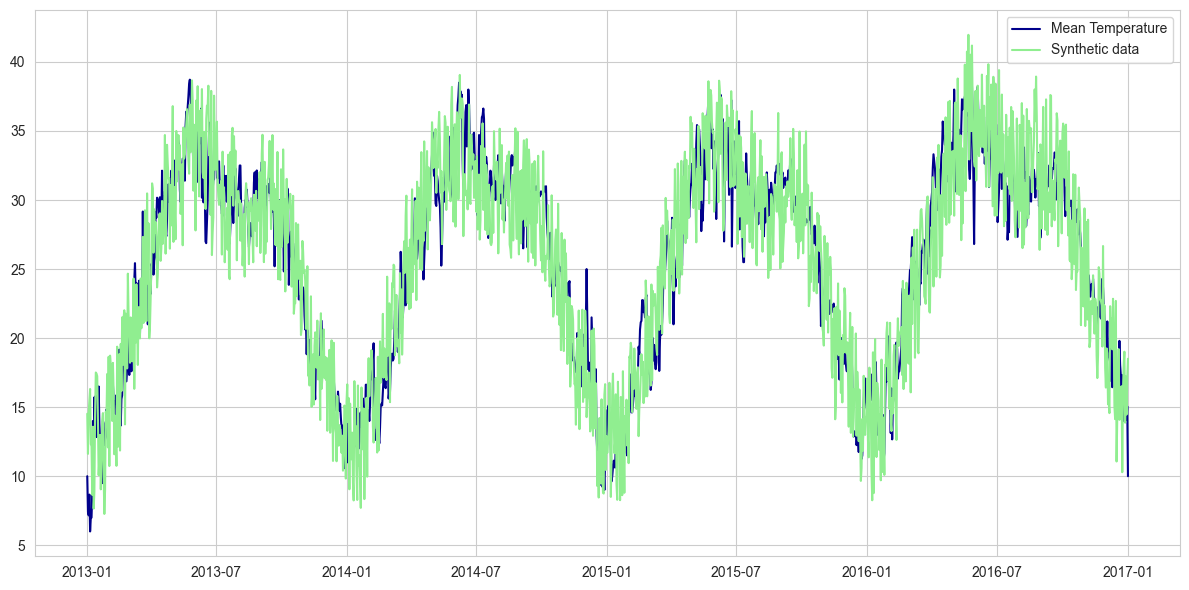

In [31]:
result = seasonal_decompose(df, model='additive', period=365, extrapolate_trend='freq')
trend = result.trend
seasonal = result.seasonal
residual = result.resid

new_residual = np.random.uniform(-5, 5, size=len(residual))
synthetic_data = trend + seasonal + new_residual

plt.figure(figsize=(12, 6))
plt.plot(df, label='Mean Temperature', color='darkblue')
plt.plot(synthetic_data, label='Synthetic data', color='lightgreen')

plt.legend()
plt.tight_layout()
plt.show()